#importing libraries

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('diabetes.csv')
df.columns
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Basic EDA and statistical analysis**

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
(df.Pregnancies == 0).sum(),(df.Glucose==0).sum(),(df.BloodPressure==0).sum(),(df.SkinThickness==0).sum(),(df.Insulin==0).sum(),(df.BMI==0).sum(),(df.DiabetesPedigreeFunction==0).sum(),(df.Age==0).sum()

(111, 5, 35, 227, 374, 11, 0, 0)

In [ ]:
df_copy = df.copy(deep=True)

In [ ]:
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
df_copy.describe()
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

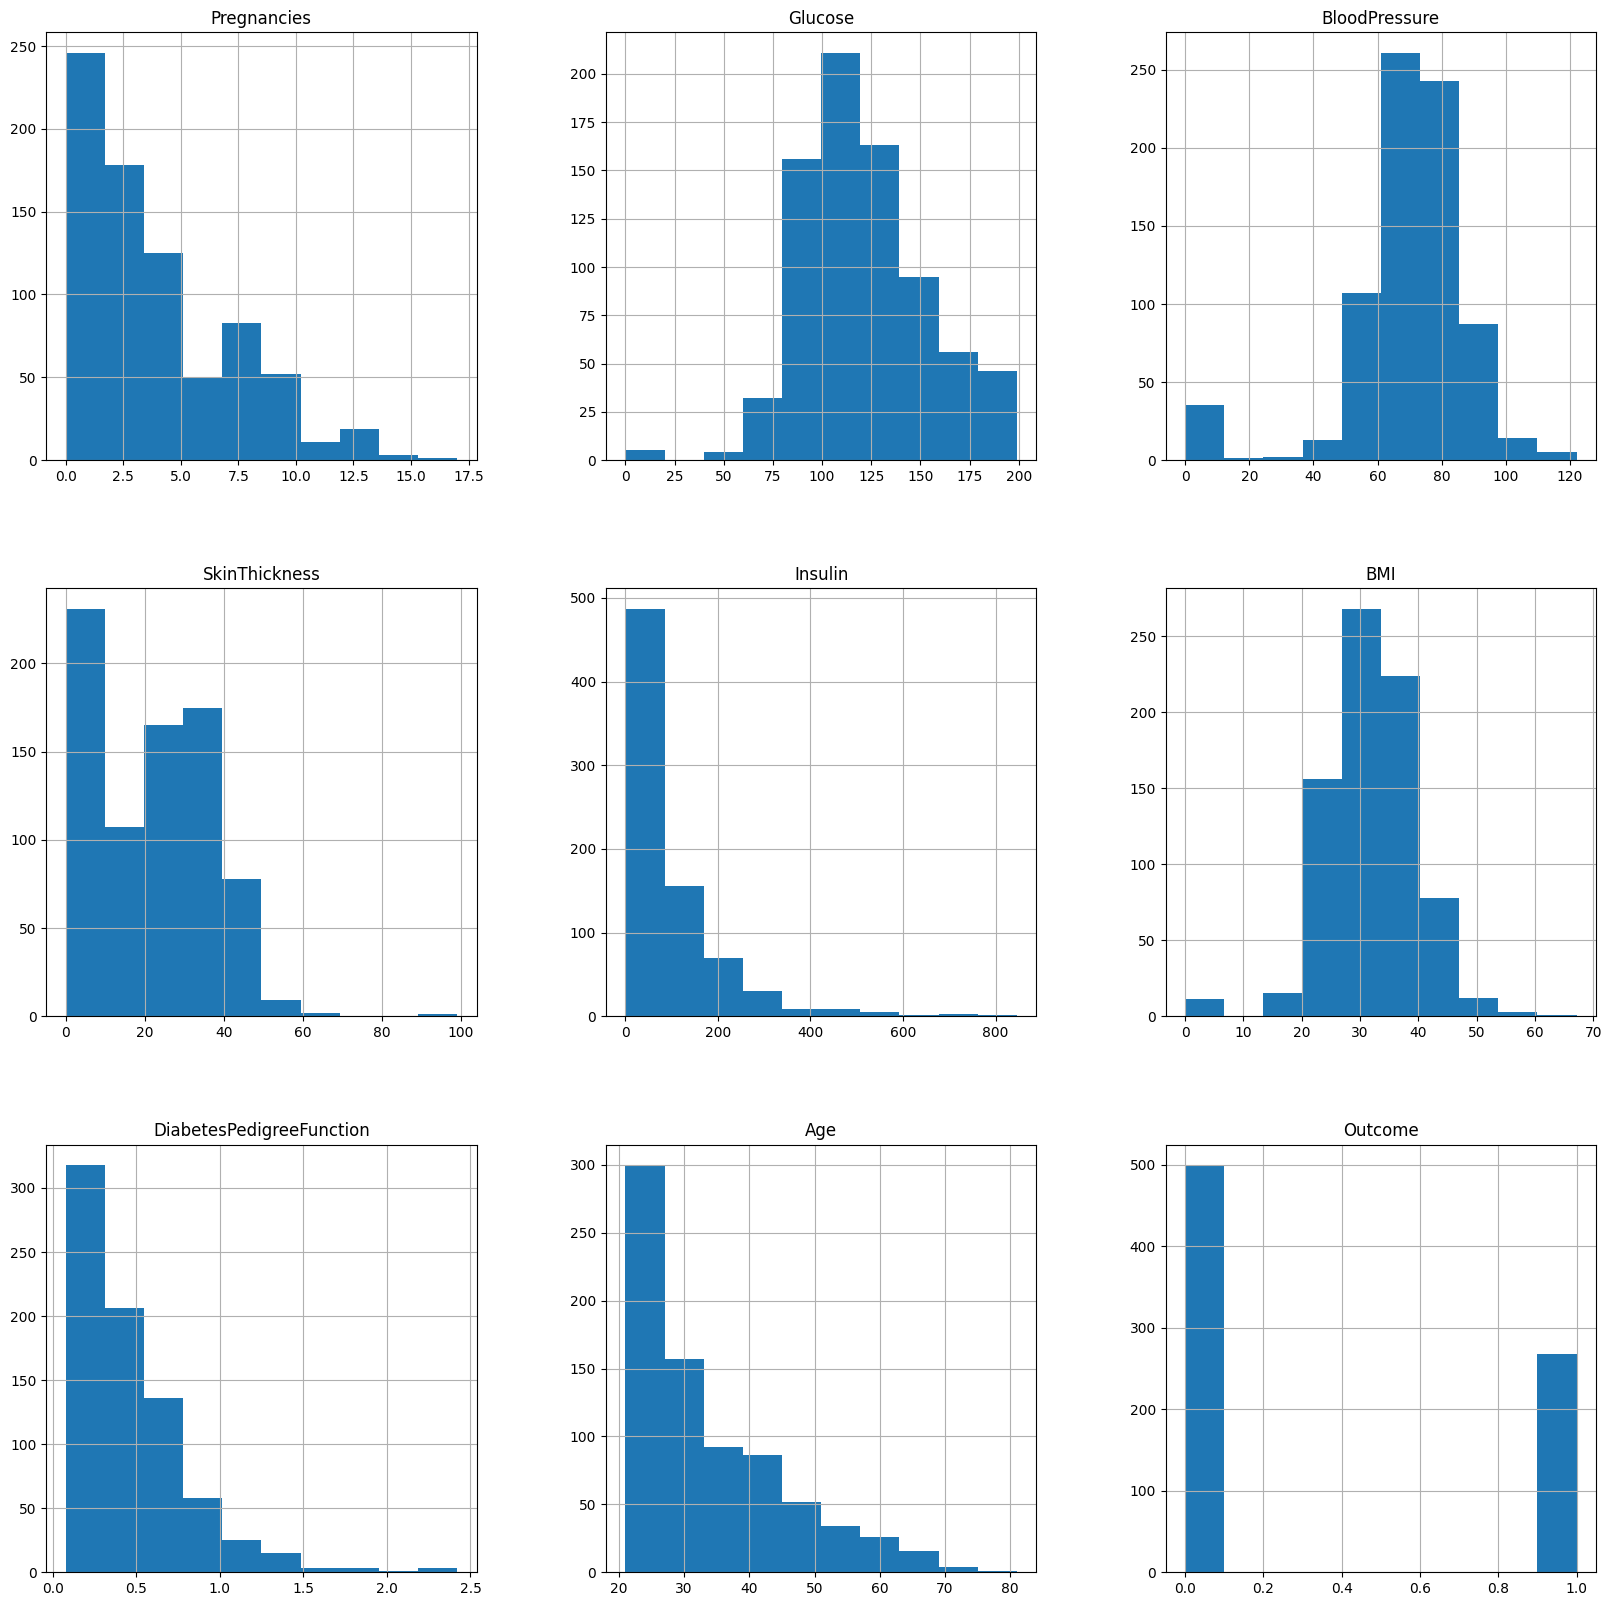

In [ ]:
p = df.hist(figsize = (20,20))

## ***Aiming to impute nan values for the columns in accordance with their distribution***

In [ ]:
df_copy['Glucose'] = df_copy['Glucose'].fillna(df_copy['Glucose'].mean())
df_copy['BloodPressure'] = df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean())
df_copy['SkinThickness'] = df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median())
df_copy['Insulin'] = df_copy['Insulin'].fillna(df_copy['Insulin'].median())
df_copy['BMI'] = df_copy['BMI'].fillna(df_copy['BMI'].mean())

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


**Pair plot for clean data**

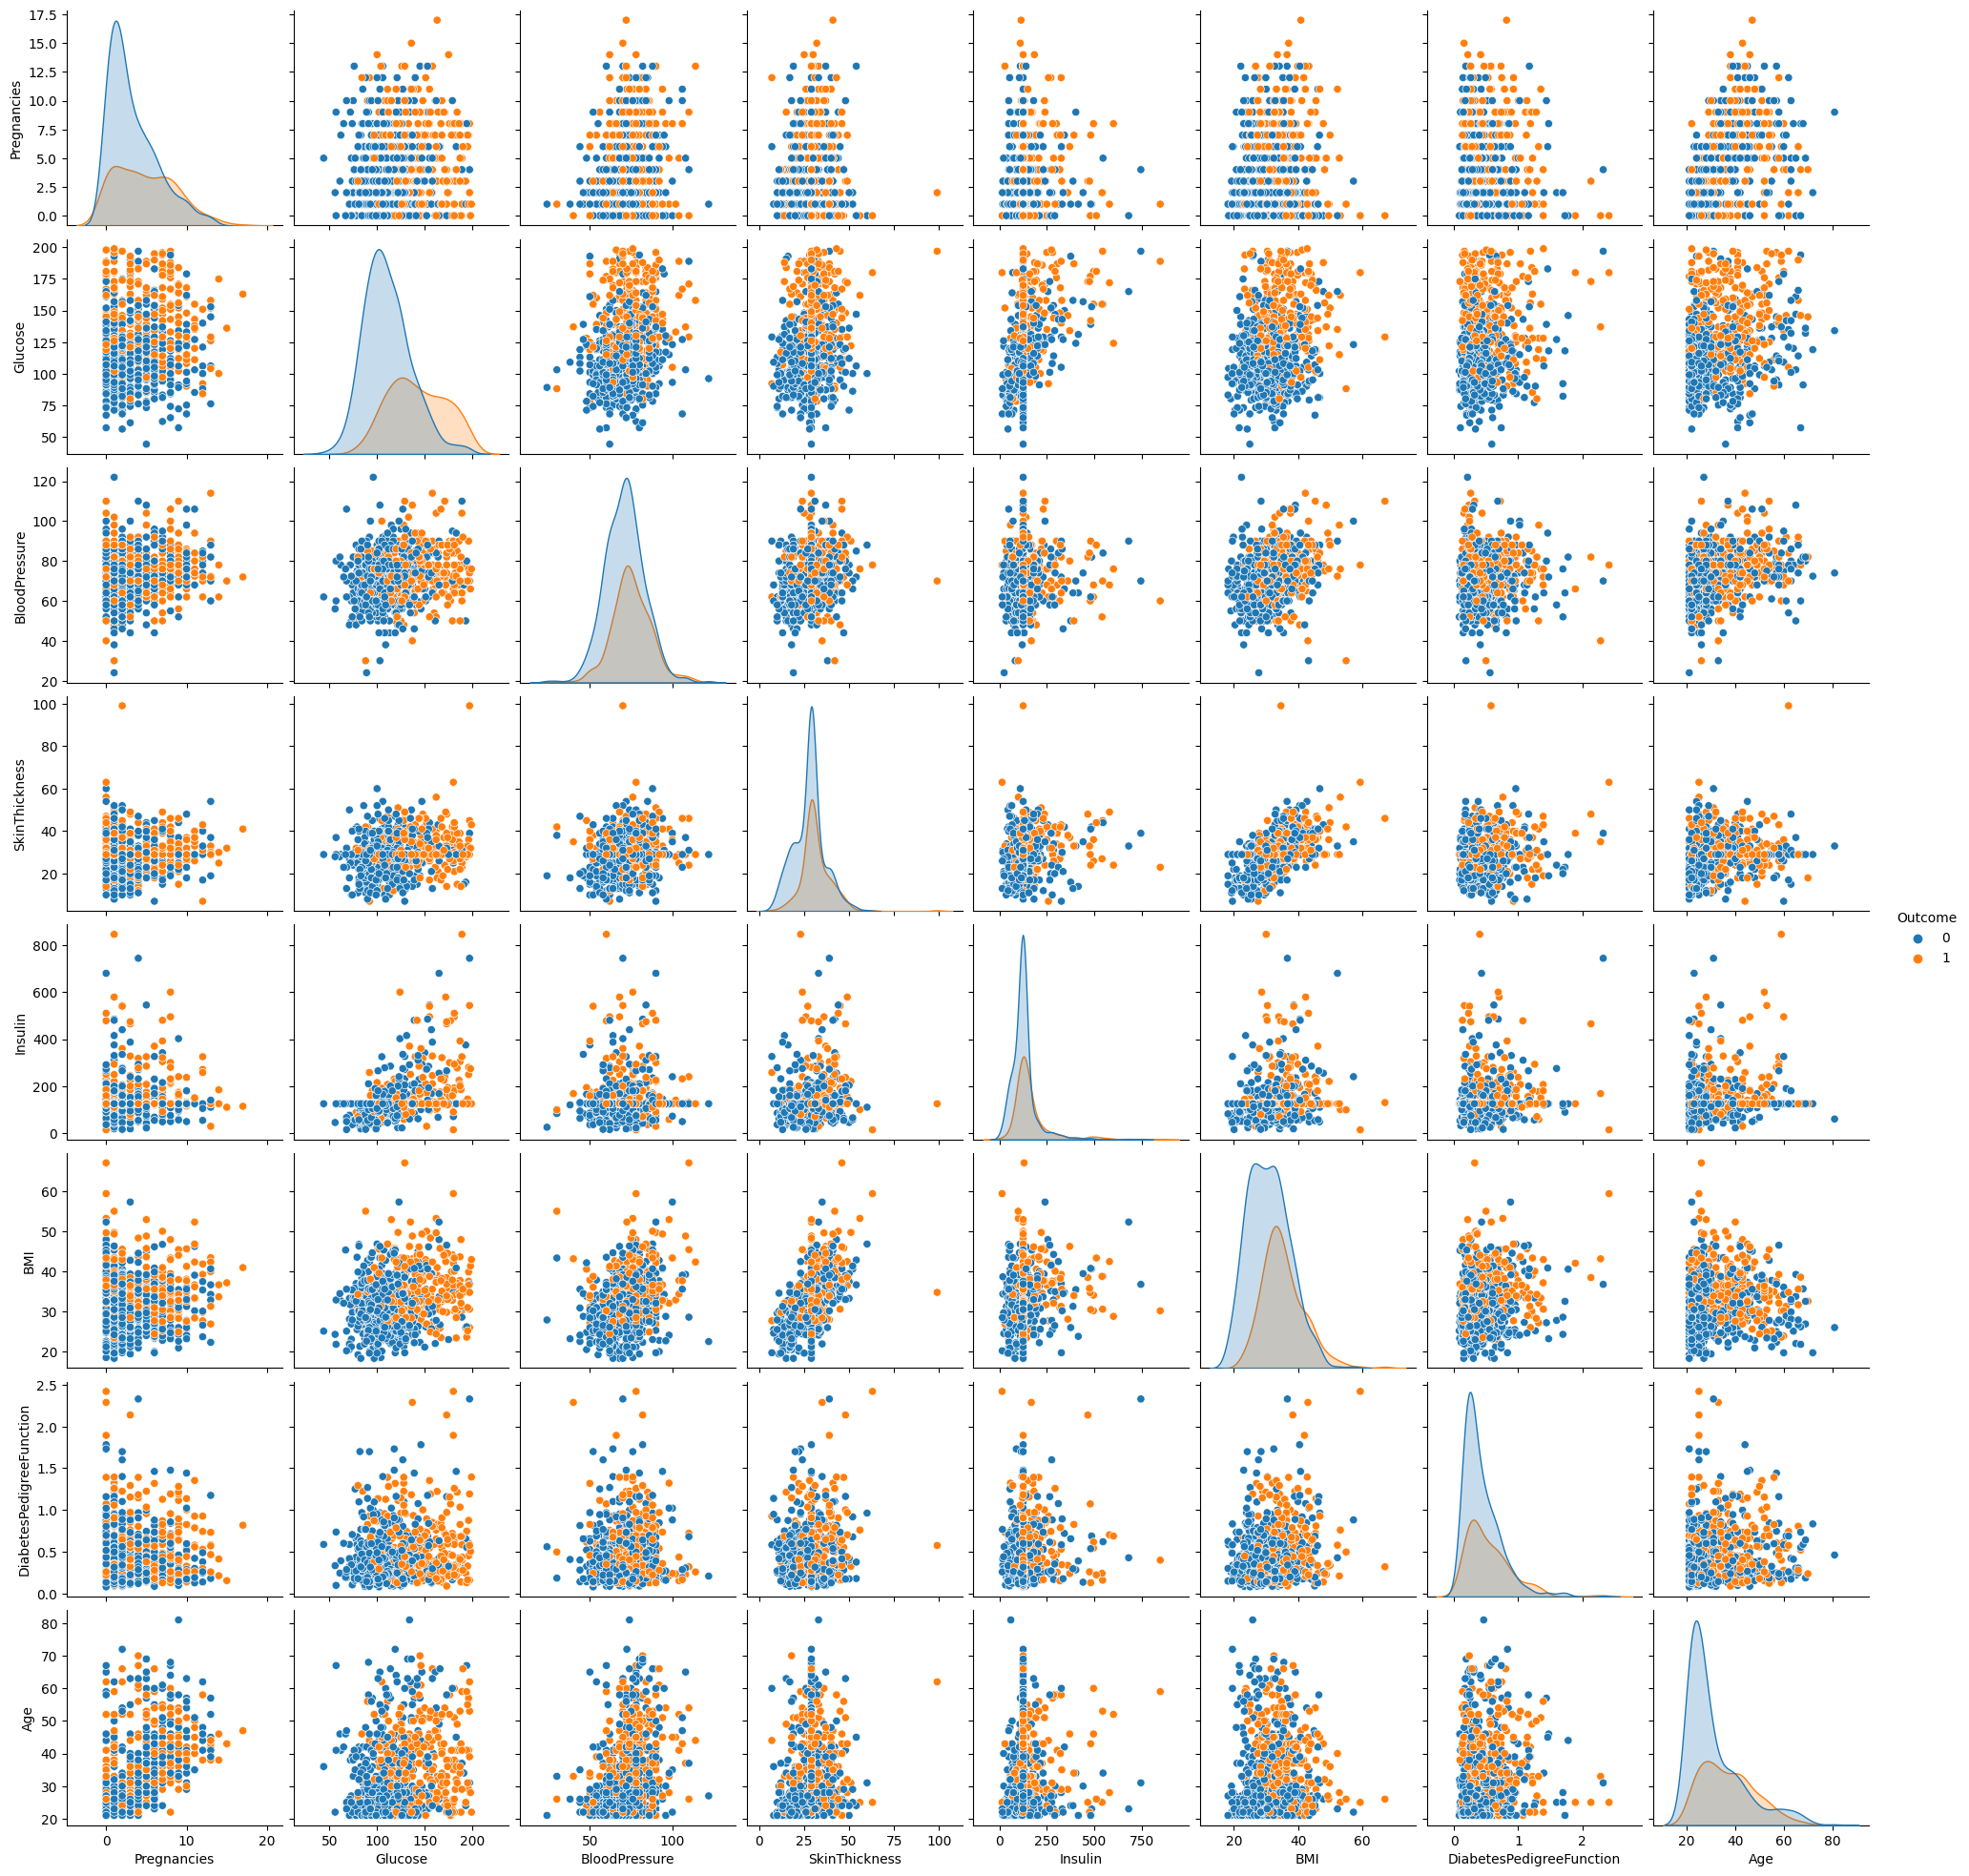

In [ ]:
import seaborn as sns
p=sns.pairplot(df_copy, hue = 'Outcome')

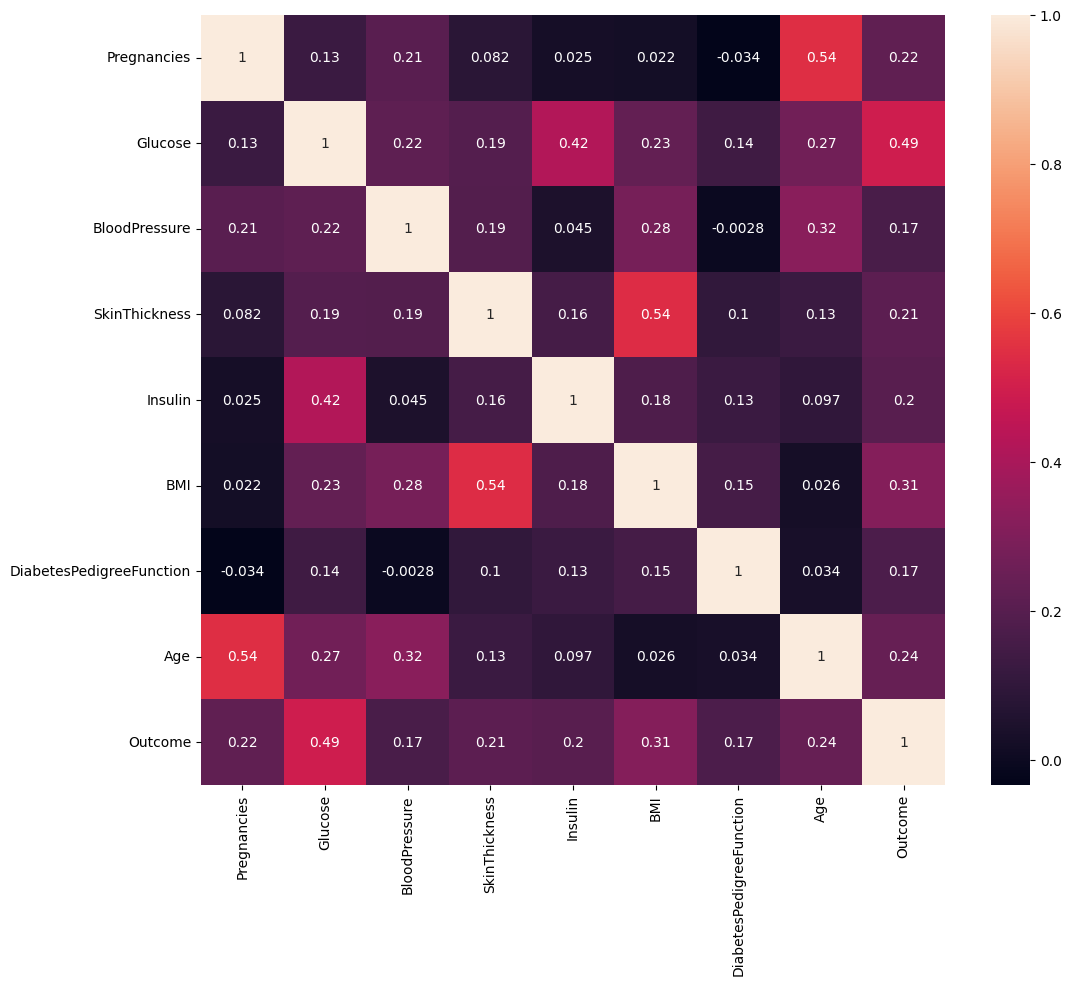

In [ ]:
plt.figure(figsize=(12, 10))
heat_map = sns.heatmap(df_copy.corr(), annot=True)

In [ ]:
X = df_copy.drop('Outcome', axis=1).values
y = df_copy['Outcome'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
metric_report = classification_report(y_test, y_pred)
c_matrix = confusion_matrix(y_test, y_pred)
print(metric_report, c_matrix)

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       405
           1       0.60      0.47      0.53       210

    accuracy                           0.71       615
   macro avg       0.68      0.65      0.66       615
weighted avg       0.70      0.71      0.70       615
 [[341  64]
 [112  98]]


In [ ]:

#Evaluation of Variance:

Variance = np.var(y_pred)
Variance

0.19402736466389053

In [ ]:
#Bias
bais = np.mean((y_pred - y_test)**2)
bais

0.2861788617886179

In [ ]:
from sklearn.svm import SVC
model_svc = SVC(kernel='rbf', random_state=42)  # Using Support Vector Machine (SVM) with RBF kernel
model_svc.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
y_pred_svc = model_svc.predict(X_test)
metric_report = classification_report(y_test, y_pred_svc)
c_matrix = confusion_matrix(y_test, y_pred_svc)
print(metric_report, c_matrix)

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       405
           1       0.67      0.59      0.63       210

    accuracy                           0.76       615
   macro avg       0.73      0.72      0.72       615
weighted avg       0.75      0.76      0.76       615
 [[343  62]
 [ 86 124]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_random_forest = RandomForestClassifier(n_estimators=100,  criterion="gini")
model_random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_forest = model_random_forest.predict(X_test)

In [ ]:
metric_report = classification_report(y_test, y_pred_forest)
c_matrix = confusion_matrix(y_test, y_pred_forest)
print(metric_report, c_matrix)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       405
           1       0.63      0.65      0.64       210

    accuracy                           0.75       615
   macro avg       0.73      0.73      0.73       615
weighted avg       0.75      0.75      0.75       615
 [[326  79]
 [ 73 137]]
